In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pickle
import random
import numpy as np
from asyncio import exceptions

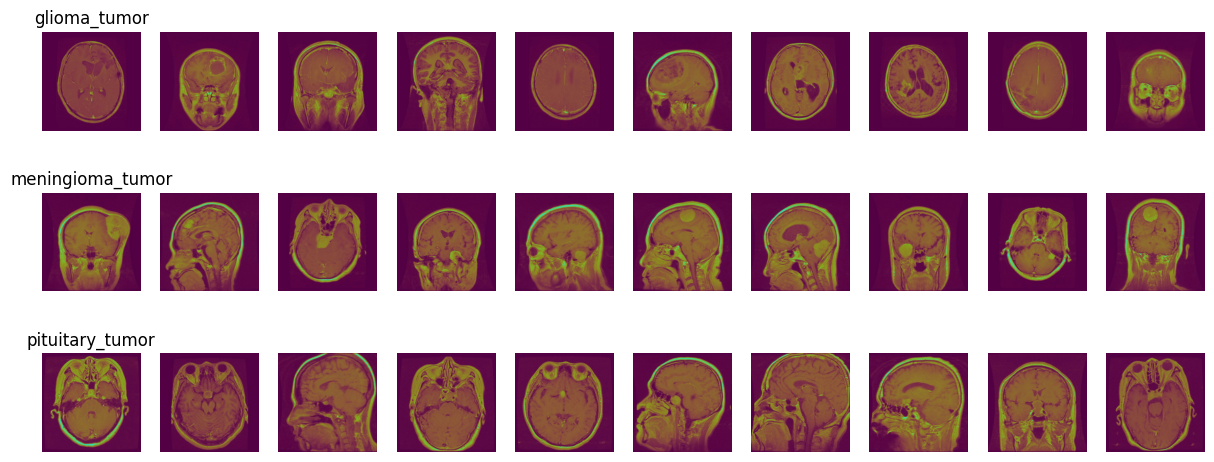

In [2]:
# Dataset 1
i=0
plt.figure(figsize=(15,8))
dir = os.path.join("Dataset 1", "Testing")
for folder in os.listdir(dir):
    folderPath = os.path.join(dir, folder)
    for file in os.listdir(folderPath):
        plt.subplot(4,10,i+1)
        filepath = os.path.join(folderPath, file)
        img = cv2.imread(filepath)
        img = cv2.resize(img, (300,300))
        plt.imshow(img)
        plt.axis('off')
        if i % 10 == 0:
            plt.title(folder)
        i = i+1
        if i % 10 == 0:
            break
plt.show()

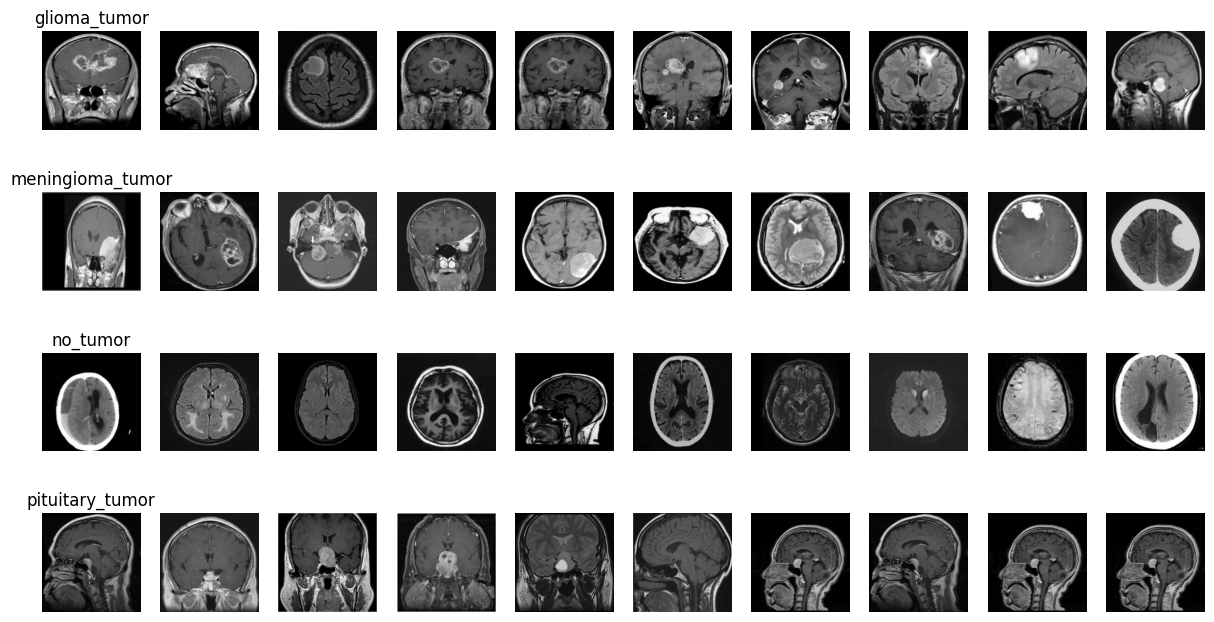

In [3]:
# Dataset 2
i=0
plt.figure(figsize=(15,8))
dir = os.path.join("Dataset 2", "Testing")
for folder in os.listdir(dir):
    folderPath = os.path.join(dir, folder)
    for file in os.listdir(folderPath):
        plt.subplot(4,10,i+1)
        filepath = os.path.join(folderPath, file)
        img = cv2.imread(filepath)
        img = cv2.resize(img, (300,300))
        plt.imshow(img)
        plt.axis('off')
        if i % 10 == 0:
            plt.title(folder)
        i = i+1
        if i % 10 == 0:
            break
plt.show()

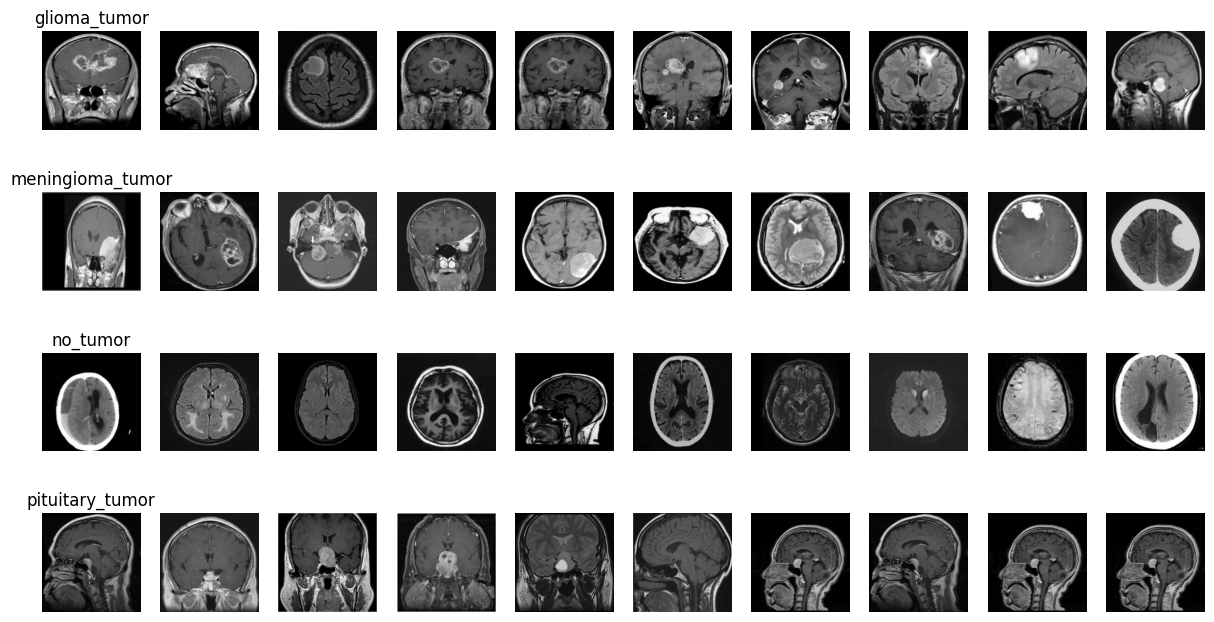

In [4]:
# Dataset 3
i=0
plt.figure(figsize=(15,8))
dir = os.path.join("Dataset 3", "Testing")
for folder in os.listdir(dir):
    folderPath = os.path.join(dir, folder)
    for file in os.listdir(folderPath):
        plt.subplot(4,10,i+1)
        filepath = os.path.join(folderPath, file)
        img = cv2.imread(filepath)
        img = cv2.resize(img, (300,300))
        plt.imshow(img)
        plt.axis('off')
        if i % 10 == 0:
            plt.title(folder)
        i = i+1
        if i % 10 == 0:
            break
plt.show()

In [5]:

IMG_SIZE = 300

dataset_1_dir = "Dataset 1"
dataset1_train_data_dir = os.path.join(dataset_1_dir, "Training")
dataset1_test_data_dir = os.path.join(dataset_1_dir, "Testing")

dataset_2_dir = "Dataset 2"
dataset2_train_data_dir = os.path.join(dataset_2_dir, "Training")
dataset2_test_data_dir = os.path.join(dataset_2_dir, "Testing")

dataset_3_dir = "Dataset 3"
dataset3_train_data_dir = os.path.join(dataset_3_dir, "Training")
dataset3_test_data_dir = os.path.join(dataset_3_dir, "Testing")


CATEGORIES = []
for i in os.listdir(dataset1_train_data_dir):
    CATEGORIES.append(i)
    
print(CATEGORIES)


['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [6]:

def getData(dir, categories):
    data = []
    for c in categories:
        path = os.path.join(dir, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
        class_num = categories.index(c) # 0
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img))   # read the image
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
                # ershape every image from (32,32) to (1,1024) for convert to 1D List
                # data.append([np.reshape(img_resized, IMG_SIZE*IMG_SIZE), class_num])
                data.append([img_resized, class_num])
            except exceptions as e:
                pass
    print(len(data))
    return data

In [7]:
dataset_1_training_data = getData(dataset1_train_data_dir, CATEGORIES)

100%|██████████| 564/564 [00:06<00:00, 83.70it/s]
0it [00:00, ?it/s]
100%|██████████| 766/766 [00:07<00:00, 97.60it/s] 

2451


In [8]:
dataset_1_testing_data = getData(dataset1_test_data_dir, CATEGORIES)

100%|██████████| 144/144 [00:01<00:00, 143.25it/s]
0it [00:00, ?it/s]
100%|██████████| 164/164 [00:01<00:00, 138.30it/s]

613


In [9]:
dataset_2_training_data = getData(dataset2_train_data_dir, CATEGORIES)

  0%|          | 0/891 [00:00<?, ?it/s]

100%|██████████| 959/959 [00:06<00:00, 149.06it/s]

3276


In [10]:
dataset_2_testing_data = getData(dataset2_test_data_dir, CATEGORIES)

100%|██████████| 296/296 [00:02<00:00, 145.29it/s]

1016


In [11]:
dataset_3_training_data = getData(dataset3_train_data_dir, CATEGORIES)

100%|██████████| 827/827 [00:05<00:00, 159.84it/s]

2870


In [12]:
dataset_3_testing_data = getData(dataset3_test_data_dir, CATEGORIES)

100%|██████████| 74/74 [00:00<00:00, 99.79it/s] 

394


In [13]:
random.shuffle(dataset_1_training_data)
random.shuffle(dataset_1_testing_data)

random.shuffle(dataset_2_training_data)
random.shuffle(dataset_2_testing_data)

random.shuffle(dataset_3_training_data)
random.shuffle(dataset_3_testing_data)

In [14]:
def get_x_y(data):
    data_x=[]
    data_y=[]
    for d in data:
        data_x.append(d[0])
        data_y.append(d[1])
    data_x = np.array(data_x)
    data_y = np.array(data_y)
    return data_x, data_y

In [15]:
dataset_1_training_data_x, dataset_1_training_data_y = get_x_y(dataset_1_training_data)
dataset_1_testing_data_x, dataset_1_testing_data_y = get_x_y(dataset_1_testing_data)

dataset_2_training_data_x, dataset_2_training_data_y = get_x_y(dataset_2_training_data)
dataset_2_testing_data_x, dataset_2_testing_data_y = get_x_y(dataset_2_testing_data)

dataset_3_training_data_x, dataset_3_training_data_y = get_x_y(dataset_3_training_data)
dataset_3_testing_data_x, dataset_3_testing_data_y = get_x_y(dataset_3_testing_data)

In [16]:
print(dataset_1_training_data_x.shape, dataset_1_training_data_y.shape)

print(dataset_1_testing_data_x.shape, dataset_1_testing_data_y.shape)

print(dataset_2_training_data_x.shape, dataset_2_training_data_y.shape)

print(dataset_2_testing_data_x.shape, dataset_2_testing_data_y.shape)

print(dataset_3_training_data_x.shape, dataset_3_training_data_y.shape)

print(dataset_3_testing_data_x.shape, dataset_3_testing_data_y.shape)


(2451, 300, 300, 3) (2451,)
(613, 300, 300, 3) (613,)
(3276, 300, 300, 3) (3276,)
(1016, 300, 300, 3) (1016,)
(2870, 300, 300, 3) (2870,)
(394, 300, 300, 3) (394,)


In [17]:
def pickle_save(data, dir, filename):
    file = open(os.path.join(dir, filename), 'wb')

    # dump information to that file
    pickle.dump(data, file)

    # close the file
    file.close()

In [18]:
# dataset_1_training_data_x = (dataset_1_training_data_x[:1000])/255.0
# dataset_1_training_data_y = (dataset_1_training_data_y[:1000])/255.0

# dataset_1_testing_data_x = (dataset_1_testing_data_x[:200])/255.0
# dataset_1_testing_data_y = (dataset_1_testing_data_y[:200])/255.0

# dataset_2_training_data_x = (dataset_2_training_data_x[:1000])/255.0
# dataset_2_training_data_y = (dataset_2_training_data_y[:1000])/255.0

# dataset_2_testing_data_x = (dataset_2_testing_data_x[:200])/255.0
# dataset_2_testing_data_y = (dataset_2_testing_data_y[:200])/255.0

# dataset_3_training_data_x = (dataset_3_training_data_x[:1000])/255.0
# dataset_3_training_data_y = (dataset_3_training_data_y[:1000])/255.0

# dataset_3_testing_data_x = (dataset_3_testing_data_x[:200])/255.0
# dataset_3_testing_data_y = (dataset_3_testing_data_y[:200])/255.0

In [19]:
pickle_save(dataset_1_training_data_x, "Pickle", "dataset_1_training_data_x.pk")
pickle_save(dataset_1_training_data_y, "Pickle", "dataset_1_training_data_y.pk")

pickle_save(dataset_1_testing_data_x, "Pickle", "dataset_1_testing_data_x.pk")
pickle_save(dataset_1_testing_data_y, "Pickle", "dataset_1_testing_data_y.pk")

pickle_save(dataset_2_training_data_x, "Pickle", "dataset_2_training_data_x.pk")
pickle_save(dataset_2_training_data_y, "Pickle", "dataset_2_training_data_y.pk")

pickle_save(dataset_2_testing_data_x, "Pickle", "dataset_2_testing_data_x.pk")
pickle_save(dataset_2_testing_data_y, "Pickle", "dataset_2_testing_data_y.pk")

pickle_save(dataset_3_training_data_x, "Pickle", "dataset_3_training_data_x.pk")
pickle_save(dataset_3_training_data_y, "Pickle", "dataset_3_training_data_y.pk")

pickle_save(dataset_3_testing_data_x, "Pickle", "dataset_3_testing_data_x.pk")
pickle_save(dataset_3_testing_data_y, "Pickle", "dataset_3_testing_data_y.pk")

In [20]:
print(dataset_1_training_data_x[50][200][200])

[116  36  70]


In [69]:
import sys
int_data = dataset_1_training_data_x[5]
float_data = (dataset_1_training_data_x[5].astype("float"))#
round_data = np.round(float_data, 2).astype("float16")
x = 0.65165161

print(int_data[0][0][0])
print(float_data[0][0][0])
print(round_data[0][0][0])
print(x)

print(sys.getsizeof(int_data), type(int_data[0][0][0]))
print(sys.getsizeof(float_data.astype('int')), type(float_data[0][0][0]))
print(sys.getsizeof(round_data), type(round_data[0][0][0]))
print(sys.getsizeof(x), type(x))

83
83.0
83.0
0.65165161
144 <class 'numpy.uint8'>
1080144 <class 'numpy.float64'>
540144 <class 'numpy.float16'>
24 <class 'float'>
